# Machine Learning Online Class - Exercise 3 | Part 2: Neural Networks

In [1]:
import numpy as np
from scipy.optimize import fmin_bfgs
from scipy.io import loadmat
import random
import matplotlib.pyplot as plt

In [2]:
#Setup the parameters you will use for this part of the exercise
input_layer_size = 400  #20x20 Input Images of Digits
hidden_layer_size = 25  #25 hidden units
num_labels = 10         #10 labels, from 1 to 10 (label '10' is used for digit '0')

## =========== Part 1: Loading and Visualizing Data =============

In [3]:
#load data from matlab file
data = loadmat("ex3data1.mat")
X = data['X']
y = data['y']
print(X.shape,y.shape)

(5000, 400) (5000, 1)


In [4]:
#randomly select 100 data points to display
rand_indices = random.sample(range(X.shape[0]), 100)
sel = X[rand_indices,:]

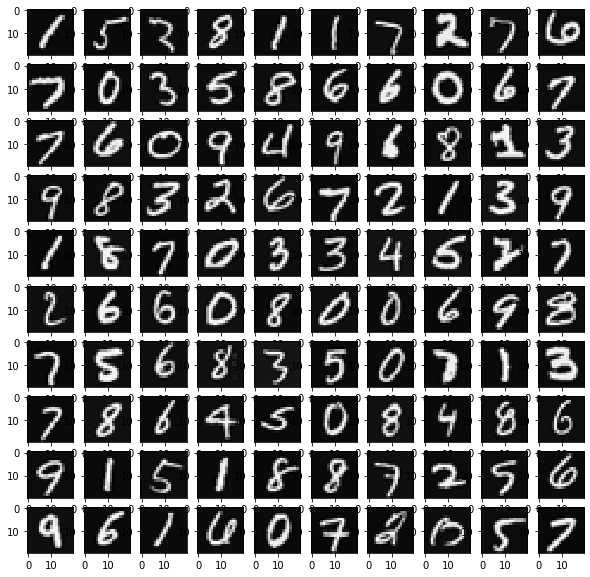

In [5]:
#Display the data as images
fig0, ax = plt.subplots(10,10,figsize=(10, 10))
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(sel[10*i+j].reshape(20,20, order='F'), cmap='gray')#order 'F' orders by column, like fortran

## ================ Part 2: Loading Pameters ================

In [6]:
# Add bias column to X
X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)

#Load the weights into variables Theta1 and Theta2
weights = loadmat("ex3weights.mat")
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
print(X.shape,Theta1.shape,Theta2.shape)

(5000, 401) (25, 401) (10, 26)


## ================= Part 3: Implement Predict =================

<img src="nnet.png" width=200/>
Parameter matrix $\theta^{(1)}$ takes us from the input to layer 2, while parameter matrix $\theta^{(2)}$ takes us from layer to to the output layer. <br ><br > 
After training the neural network, we would like to use it to predict
the labels. You will now implement the "predict" function to use the
neural network to predict the labels of the training set. This lets
you compute the training set accuracy.

In [7]:
def logi(z):
    return 1.0 / (1 + np.exp(-z))

def predict(Theta1, Theta2, X):
    z2 = np.matmul(X,Theta1.T)
    a2 = logi(z2)
    # Add bias column to a2
    a2 = np.insert(a2, 0, np.ones(a2.shape[0]), axis=1)
    print(a2.shape)
    
    z3 = np.matmul(a2,Theta2.T)
    a3 = logi(z3)
    print(a3.shape)
    pp = np.array([[np.where(row == np.max(row))[0][0]] for row in a3])
    p = np.array([i+1 for i in pp])
    return p

In [8]:
#x = X[0,:].reshape(1,401)
pred = predict(Theta1, Theta2, X)

(5000, 26)
(5000, 10)


In [9]:
print("Training set accuracy: {0:.3f}".format(np.mean(pred==y)))

Training set accuracy: 0.975
